In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import statsmodels.formula.api as smf

In [2]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [3]:
# Import csv files
monthly_composite = pd.read_csv('../Data-Analytics-Final_Project/Resources/monthly_composite.csv',index_col=False)

In [4]:
# Removing first 6 months of data due to unreliable exhaustion values
monthly_composite = monthly_composite.iloc[7:].reset_index(drop=True)

In [5]:
monthly_composite.head()

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,average_pA,average_pB,average_pD,average_pC
0,200201,19178.0,74.0,25.46,0.219,1.45,22,872.0,0.214,NaN,NaN,NaN
1,200202,18074.0,61.0,29.85,0.221,1.92,21,861.0,0.206,NaN,NaN,NaN
2,200203,17399.0,67.0,30.10,0.229,1.57,20,870.0,0.230,NaN,NaN,NaN
3,200204,23748.0,75.0,31.33,0.241,1.37,19,1250.0,0.215,NaN,NaN,NaN
4,200205,23976.0,79.0,37.39,0.235,1.32,21,1142.0,0.205,NaN,NaN,NaN


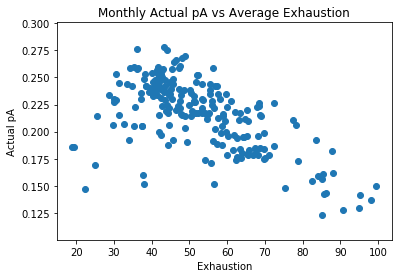

In [6]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(monthly_composite['average_exhaustion'],monthly_composite['average_pA'])
plt.title('Monthly Actual pA vs Average Exhaustion')
ax.set_ylabel('Actual pA')
ax.set_xlabel('Exhaustion')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pA_exhaustion.png', dpi=96)
plt.show()

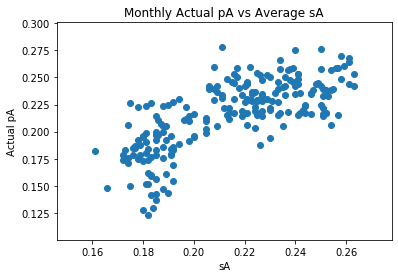

In [7]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(monthly_composite['average_sA'],monthly_composite['average_pA'])
plt.title('Monthly Actual pA vs Average sA')
ax.set_ylabel('Actual pA')
ax.set_xlabel('sA')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pA_sA.png', dpi=96)
plt.show()

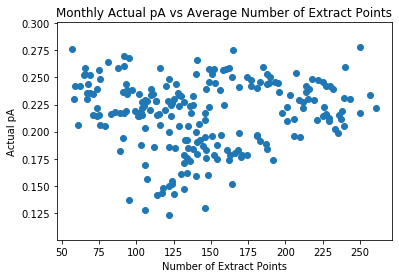

In [8]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(monthly_composite['number_extract_points'],monthly_composite['average_pA'])
plt.title('Monthly Actual pA vs Average Number of Extract Points')
ax.set_ylabel('Actual pA')
ax.set_xlabel('Number of Extract Points')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pA_extract_pts.png', dpi=96)
plt.show()

In [9]:
monthly_sel = monthly_composite[['average_exhaustion','average_sA','number_extract_points','average_pA']]
model = forward_selected(monthly_sel,'average_pA')

In [10]:
print (model.model.formula)

average_pA ~ average_sA + average_exhaustion + number_extract_points + 1


In [11]:
print(model.rsquared_adj)

0.6516485146647062


In [12]:
X = monthly_composite[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_composite['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)

(218, 3) (218, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.6708548003221289
Testing Score: 0.6112673689534845


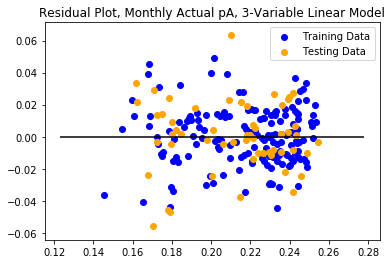

In [16]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
ax.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot, Monthly Actual pA, 3-Variable Linear Model')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pA_linear_residual.png', dpi=96)
plt.show()

In [17]:
monthly_pA = monthly_composite.copy()
monthly_pA = monthly_pA[['year_month','average_exhaustion','average_sA','number_extract_points','average_pA']].dropna()
monthly_pA.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pA
0,200201,25.46,0.219,74.0,0.214
1,200202,29.85,0.221,61.0,0.206
2,200203,30.10,0.229,67.0,0.230
3,200204,31.33,0.241,75.0,0.215
4,200205,37.39,0.235,79.0,0.205


In [18]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [19]:
variables_used = 'Exhaustion, sA, Number Extract Points'
num_variables = 3
X = monthly_pA[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 3) (218, 1)
Exhaustion, sA, Number Extract Points
Training Score: 0.6708548003221289
Testing Score: 0.6112673689534845
R2 Value: [0.65635044]
Adjusted R2 value: [0.65153292]
MSE: 0.00035745383465526014


In [20]:
variables_used = 'Exhaustion'
num_variables = 1
X = monthly_pA[['average_exhaustion']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 1) (218, 1)
Exhaustion
Training Score: 0.3729098901842257
Testing Score: 0.35086205759583133


In [21]:
variables_used = 'sA'
num_variables = 1
X = monthly_pA[['average_sA']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 1) (218, 1)
sA
Training Score: 0.5442251273011303
Testing Score: 0.48995211606152084


In [22]:
variables_used = 'Number Extract Points'
num_variables = 1
X = monthly_pA[['number_extract_points']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 1) (218, 1)
Number Extract Points
Training Score: 0.0012662804106897685
Testing Score: -0.03761436143189645


In [23]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = monthly_pA[['average_exhaustion','average_sA']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
predicted = model.predict(X)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 2) (218, 1)
Exhaustion, sA
Training Score: 0.6242606029881328
Testing Score: 0.5611107674776958


In [24]:
variables_used = 'Exhaustion, Number Extract Points'
num_variables = 2
X = monthly_pA[['average_exhaustion','number_extract_points']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 2) (218, 1)
Exhaustion, Number Extract Points
Training Score: 0.3729404037806824
Testing Score: 0.3515495250839451


In [25]:
variables_used = 'sA, Number Extract Points'
num_variables = 2
X = monthly_pA[['average_sA','number_extract_points']]
y = monthly_pA['average_pA'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 3)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(218, 2) (218, 1)
sA, Number Extract Points
Training Score: 0.621922080337578
Testing Score: 0.5597001609662715


In [26]:
pA_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pA_reg_results_df = pd.DataFrame(pA_reg_results).sort_values('Score',ascending=False)
pA_reg_results_df

,Variables,Number of Variables,Score,MSE
0,"Exhaustion, sA, Number Extract Points",3,0.656350,0.000357
4,"Exhaustion, sA",2,0.609123,0.000407
6,"sA, Number Extract Points",2,0.607075,0.000409
2,sA,1,0.532370,0.000486
5,"Exhaustion, Number Extract Points",2,0.372157,0.000653
1,Exhaustion,1,0.371935,0.000653
3,Number Extract Points,1,-0.001383,0.001042


In [27]:
monthly_pA.to_csv('Resources/monthly_pA.csv',index=False)

Similar to the other results, all three variables yield the best score

In [28]:
# pB analysis starts here

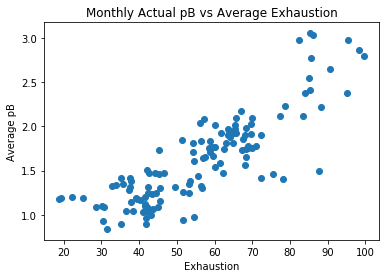

In [29]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(monthly_composite['average_exhaustion'],monthly_composite['average_pB'])
plt.title('Monthly Actual pB vs Average Exhaustion')
ax.set_ylabel('Average pB')
ax.set_xlabel('Exhaustion')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pB_exhaustion.png', dpi=96)
plt.show()

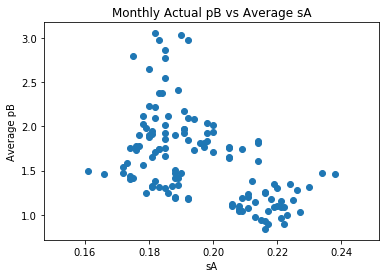

In [30]:
fig, ax = plt.subplots()
ax.scatter(monthly_composite['average_sA'],monthly_composite['average_pB'])
plt.title('Monthly Actual pB vs Average sA')
ax.set_ylabel('Average pB')
ax.set_xlabel('sA')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pB_sA.png', dpi=96)
plt.show()

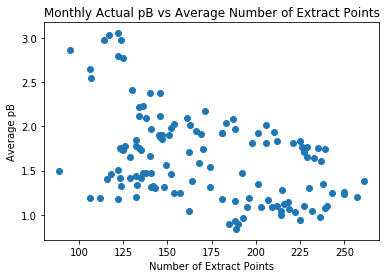

In [31]:
fig, ax = plt.subplots()
ax.scatter(monthly_composite['number_extract_points'],monthly_composite['average_pB'])
plt.title('Monthly Actual pB vs Average Number of Extract Points')
ax.set_ylabel('Average pB')
ax.set_xlabel('Number of Extract Points')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pB_extract_pts.png', dpi=96)
plt.show()

In [32]:
monthly_pB = monthly_composite.copy()
monthly_pB = monthly_pB[['average_exhaustion','average_sA','number_extract_points','average_pB']].dropna()
monthly_sel = monthly_pB.copy()
model = forward_selected(monthly_sel,'average_pB')
print (model.model.formula)
print(model.rsquared_adj)

average_pB ~ average_exhaustion + number_extract_points + average_sA + 1
0.7268081605421162


In [33]:
X = monthly_pB[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)

(128, 3) (128, 1)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size=0.25)
model = LinearRegression()

In [35]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.7504033932006411
Testing Score: 0.6554841400098219


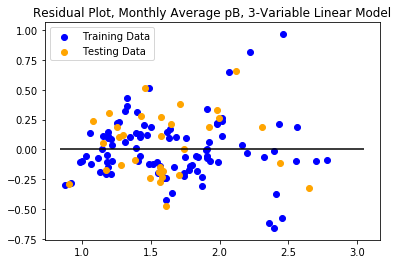

In [36]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
ax.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot, Monthly Average pB, 3-Variable Linear Model')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pB_linear_residual.png', dpi=96)
plt.show()

In [37]:
monthly_pB = monthly_composite.copy()
monthly_pB = monthly_pB[['year_month','average_exhaustion','average_sA','number_extract_points','average_pB']].dropna()
monthly_pB.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pB
90,200908,45.33,0.238,152.0,1.464125
91,200909,46.52,0.234,141.0,1.472000
92,200910,42.35,0.230,174.0,1.319250
93,200911,37.27,0.226,215.0,1.285053
94,200912,35.62,0.224,201.0,1.344667


In [38]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [39]:
variables_used = 'Exhaustion, sA, Number Extract Points'
num_variables = 3
X = monthly_pB[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 3) (128, 1)
Exhaustion, sA, Number Extract Points
Training Score: 0.7504033932006411
Testing Score: 0.6554841400098219
R2 Value: [0.73245076]
Adjusted R2 value: [0.7259778]
MSE: 0.06734513989875783


In [40]:
variables_used = 'Exhaustion'
num_variables = 1
X = monthly_pB[['average_exhaustion']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 1) (128, 1)
Exhaustion
Training Score: 0.7248785185748112
Testing Score: 0.6452904323093361


In [41]:
variables_used = 'sA'
num_variables = 1
X = monthly_pB[['average_sA']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 1) (128, 1)
sA
Training Score: 0.2646832294620409
Testing Score: 0.21330278568291539


In [42]:
variables_used = 'Number Extract Points'
num_variables = 1
X = monthly_pB[['number_extract_points']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 1) (128, 1)
Number Extract Points
Training Score: 0.23183440050620763
Testing Score: 0.06199883982266497


In [43]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = monthly_pB[['average_exhaustion','average_sA']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 2) (128, 1)
Exhaustion, sA
Training Score: 0.7261689688576154
Testing Score: 0.647908177995038


In [44]:
variables_used = 'Exhaustion, Number Extract Points'
num_variables = 2
X = monthly_pB[['average_exhaustion','number_extract_points']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 2) (128, 1)
Exhaustion, Number Extract Points
Training Score: 0.7454836040919096
Testing Score: 0.6592143362727508


In [45]:
variables_used = 'sA, Number Extract Points'
num_variables = 2
X = monthly_pB[['average_sA','number_extract_points']]
y = monthly_pB['average_pB'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 2) (128, 1)
sA, Number Extract Points
Training Score: 0.2925213000373158
Testing Score: 0.19835093330903175


In [46]:
pB_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pB_reg_results_df = pd.DataFrame(pB_reg_results).sort_values('Score',ascending=False)
pB_reg_results_df

,Variables,Number of Variables,Score,MSE
0,"Exhaustion, sA, Number Extract Points",3,0.732451,0.067345
5,"Exhaustion, Number Extract Points",2,0.729368,0.068121
4,"Exhaustion, sA",2,0.711862,0.072528
1,Exhaustion,1,0.710305,0.072920
6,"sA, Number Extract Points",2,0.278056,0.181721
2,sA,1,0.259332,0.186434
3,Number Extract Points,1,0.202052,0.200852


In [47]:
monthly_pB.to_csv('Resources/monthly_pB.csv',index=False)

In [48]:
#pC only has 32 data points in this set, there is not enough for a valid regression, therefor monthly pC analysis will be skipped

In [49]:
# pD analysis begins here

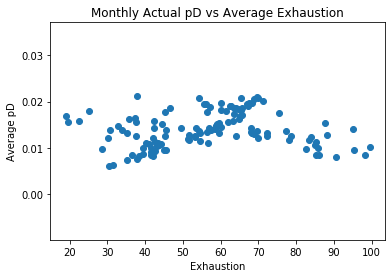

In [50]:
# Look at scatter plots of each independent variable to identify any trends right away
fig, ax = plt.subplots()
ax.scatter(monthly_composite['average_exhaustion'],monthly_composite['average_pD'])
plt.title('Monthly Actual pD vs Average Exhaustion')
ax.set_ylabel('Average pD')
ax.set_xlabel('Exhaustion')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pD_exhaustion.png', dpi=96)
plt.show()

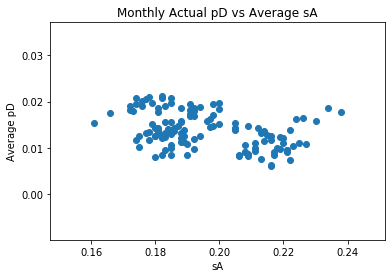

In [51]:
fig, ax = plt.subplots()
ax.scatter(monthly_composite['average_sA'],monthly_composite['average_pD'])
plt.title('Monthly Actual pD vs Average sA')
ax.set_ylabel('Average pD')
ax.set_xlabel('sA')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pD_sA.png', dpi=96)
plt.show()

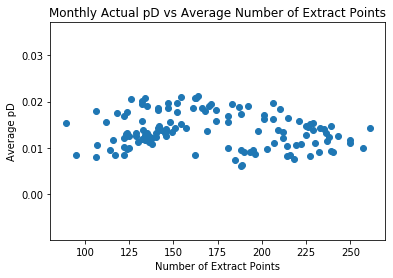

In [52]:
fig, ax = plt.subplots()
ax.scatter(monthly_composite['number_extract_points'],monthly_composite['average_pD'])
plt.title('Monthly Actual pD vs Average Number of Extract Points')
ax.set_ylabel('Average pD')
ax.set_xlabel('Number of Extract Points')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pD_extract_pts.png', dpi=96)
plt.show()

In [53]:
monthly_pD = monthly_composite.copy()
monthly_pD = monthly_pD[['average_exhaustion','average_sA','number_extract_points','average_pD']].dropna()
monthly_sel = monthly_pD.copy()
model = forward_selected(monthly_sel,'average_pD')
print (model.model.formula)
print(model.rsquared_adj)

average_pD ~ average_sA + number_extract_points + average_exhaustion + 1
0.1630526379891979


In [54]:
X = monthly_pD[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pD['average_pD'].values.reshape(-1,1)
print(X.shape,y.shape)

(128, 3) (128, 1)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 33,test_size=0.25)
model = LinearRegression()

In [56]:
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')

Training Score: 0.17527100364912296
Testing Score: 0.1455709569058129


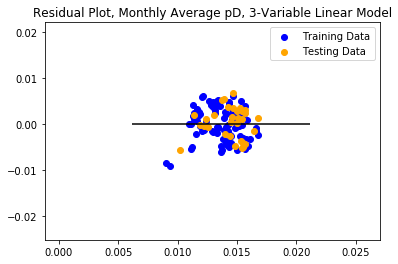

In [57]:
fig, ax = plt.subplots()
ax.scatter(model.predict(X_train),model.predict(X_train) - y_train, c='blue',label='Training Data')
ax.scatter(model.predict(X_test),model.predict(X_test) - y_test, c='orange', label='Testing Data')
plt.legend()
plt.hlines(y=0,xmin=y.min(),xmax=y.max())
plt.title('Residual Plot, Monthly Average pD, 3-Variable Linear Model')
fig.set_size_inches(6, 4)
fig.savefig('Images/month_pD_linear_residual.png', dpi=96)
plt.show()

In [58]:
monthly_pD = monthly_composite.copy()
monthly_pD = monthly_pD[['year_month','average_exhaustion','average_sA','number_extract_points','average_pD']].dropna()
monthly_pD.head()

,year_month,average_exhaustion,average_sA,number_extract_points,average_pD
90,200908,45.33,0.238,152.0,0.017667
91,200909,46.52,0.234,141.0,0.018667
92,200910,42.35,0.230,174.0,0.015900
93,200911,37.27,0.226,215.0,0.016556
94,200912,35.62,0.224,201.0,0.016238


In [59]:
variables_list = []
num_vars_list = []
score_list = []
mse_list = []

In [60]:
variables_used = 'Exhaustion, sA, Number Extract Points'
num_variables = 3
X = monthly_pD[['average_exhaustion','average_sA','number_extract_points']]
y = monthly_pD['average_pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
SS_Residual = sum((y-predicted)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'R2 Value: {r_squared}')
print(f'Adjusted R2 value: {adjusted_r_squared}')
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE: {mean_squared_error(y,predicted)}')
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 3) (128, 1)
Exhaustion, sA, Number Extract Points
Training Score: 0.17805123428490555
Testing Score: 0.19332973168297585
R2 Value: [0.18207021]
Adjusted R2 value: [0.16228159]
MSE: 1.1614269828463315e-05


In [61]:
variables_used = 'Exhaustion'
num_variables = 1
X = monthly_pD[['average_exhaustion']]
y = monthly_pD['average_pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 1) (128, 1)
Exhaustion
Training Score: 0.007221179155138647
Testing Score: 0.019925127346603677


In [62]:
variables_used = 'sA'
num_variables = 1
X = monthly_pD[['average_sA']]
y = monthly_pD['average_pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 1) (128, 1)
sA
Training Score: 0.132308058607149
Testing Score: 0.18023015684682608


In [63]:
variables_used = 'Number Extract Points'
num_variables = 1
X = monthly_pD[['number_extract_points']]
y = monthly_pD['average_pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 1) (128, 1)
Number Extract Points
Training Score: 0.02142216508492767
Testing Score: 0.03400826163629911


In [64]:
variables_used = 'Exhaustion, sA'
num_variables = 2
X = monthly_pD[['average_exhaustion','average_sA']]
y = monthly_pD['average_pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 2) (128, 1)
Exhaustion, sA
Training Score: 0.15441441949870682
Testing Score: 0.18387508916178652


In [65]:
variables_used = 'Exhaustion, Number Extract Points'
num_variables = 2
X = monthly_pD[['average_exhaustion','number_extract_points']]
y = monthly_pD['average_pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 2) (128, 1)
Exhaustion, Number Extract Points
Training Score: 0.022156362669197738
Testing Score: 0.03946435543097015


In [66]:
variables_used = 'sA, Number Extract Points'
num_variables = 2
X = monthly_pD[['average_sA','number_extract_points']]
y = monthly_pD['average_pD'].values.reshape(-1,1)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)
model = LinearRegression()
model.fit(X_train,y_train)
training_score = model.score(X_train,y_train)
testing_score = model.score(X_test,y_test)
print(variables_used)
print(f'Training Score: {training_score}')
print(f'Testing Score: {testing_score}')
predicted = model.predict(X)
variables_list.append(variables_used)
num_vars_list.append(num_variables)
score_list.append(model.score(X,y))
mse_list.append(mean_squared_error(y,predicted))

(128, 2) (128, 1)
sA, Number Extract Points
Training Score: 0.1566977253138373
Testing Score: 0.18577552551421483


In [67]:
pD_reg_results = {'Variables':variables_list,
              'Number of Variables':num_vars_list,
              'Score':score_list,
              'MSE':mse_list}
pD_reg_results_df = pd.DataFrame(pD_reg_results).sort_values('Score',ascending=False)
pD_reg_results_df

,Variables,Number of Variables,Score,MSE
0,"Exhaustion, sA, Number Extract Points",3,0.182070,0.000012
6,"sA, Number Extract Points",2,0.164095,0.000012
4,"Exhaustion, sA",2,0.161906,0.000012
2,sA,1,0.144317,0.000012
5,"Exhaustion, Number Extract Points",2,0.026725,0.000014
3,Number Extract Points,1,0.024838,0.000014
1,Exhaustion,1,0.010671,0.000014


In [68]:
monthly_pD.to_csv('Resources/monthly_pD.csv',index=False)